<a href="https://colab.research.google.com/github/Efind2/Artificial-intelligence/blob/main/A_star.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import heapq

def a_star(grid, start, goal):
    def heuristic(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    open_list = []
    heapq.heappush(open_list, (0, start))

    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}
    came_from = {}

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        for direction in directions:
            neighbor = (current[0] + direction[0], current[1] + direction[1])

            if 0 <= neighbor[0] < len(grid) and 0 <= neighbor[1] < len(grid[0]) and grid[neighbor[0]][neighbor[1]] == 0:
                tentative_g_score = g_score[current] + 1

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return None



In [2]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_path(grid, path, start, goal):
    grid = np.array(grid)
    for (x, y) in path:
        grid[x, y] = 2  # Menandai jalur
    grid[start[0], start[1]] = 3  # Menandai titik awal
    grid[goal[0], goal[1]] = 4  # Menandai titik tujuan

    cmap = plt.cm.get_cmap("Accent", 5)

    bounds = [0, 1, 2, 3, 4]
    norm = plt.Normalize(vmin=0, vmax=4)

    plt.imshow(grid, cmap=cmap, norm=norm)
    plt.colorbar(ticks=[0, 1, 2, 3, 4], format=plt.FuncFormatter(lambda val, loc: ['Empty', 'Obstacle', 'Path', 'Start', 'Goal'][int(val)]))
    plt.title("A* Pathfinding Visualization")
    plt.show()


In [3]:
grid = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 1, 1, 1, 1, 0],
    [0, 1, 0, 1, 0, 1, 0, 0, 1, 0],
    [0, 1, 0, 0, 0, 1, 0, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]

start = (0, 0)
goal = (9, 9)

Jalur ditemukan: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]


<ipython-input-2-83b9b8bd845a>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("Accent", 5)


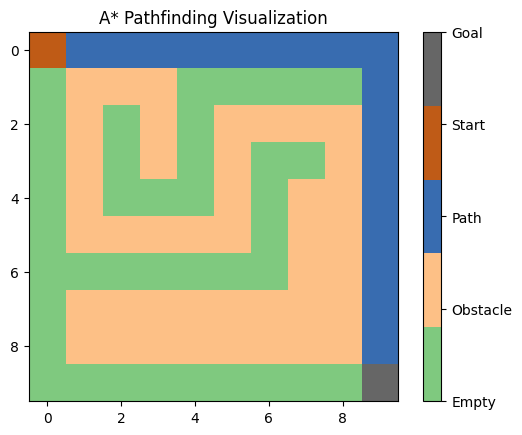

In [4]:
path = a_star(grid, start, goal)

if path:
    print("Jalur ditemukan:", path)
    visualize_path(grid, path, start, goal)
else:
    print("Tidak ada jalur yang ditemukan")


Analisis untuk contoh diatas
kode tersebut untuk menentukan jalur terpendek dengan menggunkan metode A star pada grid 2 dimensin 10x10 dengan cara mengecek atau memastikan atas,bawah,kanan,kiri yang tidak keluar grid dan bukan rintangan pada kode tersebut rintangan diberi angka 1

disini saya menggunakan studi kasus mencari jalur terpendek dari kota A ke B

Jalur ditemukan: A → B → E → H → I


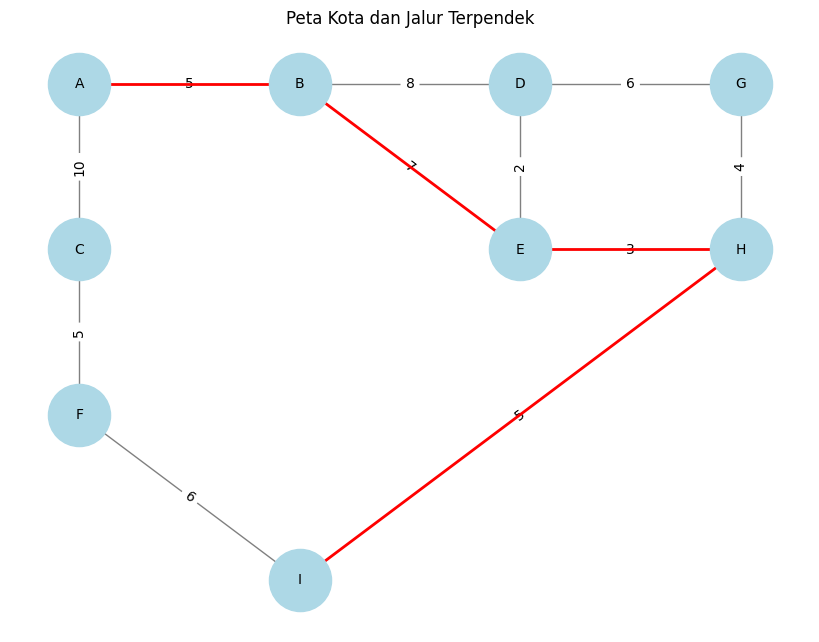

In [9]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def a_star_graph(graph, start, goal):
    def heuristic(a, b):
        return abs(city_coords[a][0] - city_coords[b][0]) + abs(city_coords[a][1] - city_coords[b][1])

    open_list = []
    heapq.heappush(open_list, (0, start))

    g_score = {node: float('inf') for node in graph}
    g_score[start] = 0

    f_score = {node: float('inf') for node in graph}
    f_score[start] = heuristic(start, goal)

    came_from = {}

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        for neighbor, distance in graph[current].items():
            tentative_g_score = g_score[current] + distance

            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return None

def visualize_graph(graph, path=None):
    G = nx.Graph()

    for node, edges in graph.items():
        for neighbor, distance in edges.items():
            G.add_edge(node, neighbor, weight=distance)

    pos = city_coords  # Posisi kota pada graf
    labels = {node: node for node in graph}

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)

    edge_labels = {(node, neighbor): graph[node][neighbor] for node in graph for neighbor in graph[node]}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    if path:
        path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.title("Peta Kota dan Jalur Terpendek")
    plt.show()

# **Data Kota dan Jalan Antar Kota**
graph = {
    'A': {'B': 5, 'C': 10},
    'B': {'A': 5, 'D': 8, 'E': 7},
    'C': {'A': 10, 'F': 5},
    'D': {'B': 8, 'E': 2, 'G': 6},
    'E': {'B': 7, 'D': 2, 'H': 3},
    'F': {'C': 5, 'I': 6},
    'G': {'D': 6, 'H': 4},
    'H': {'E': 3, 'G': 4, 'I': 5},
    'I': {'F': 6, 'H': 5}
}

# Koordinat Kota (untuk visualisasi)
city_coords = {
    'A': (0, 3), 'B': (1, 3), 'C': (0, 2), 'D': (2, 3),
    'E': (2, 2), 'F': (0, 1), 'G': (3, 3), 'H': (3, 2),
    'I': (1, 0)
}

start = 'A'
goal = 'I'
path = a_star_graph(graph, start, goal)

if path:
    print("Jalur ditemukan:", " → ".join(path))
    visualize_graph(graph, path)
else:
    print("Tidak ada jalur yang ditemukan")
